# Agriculture Crop Disease Classifier App

# PROBLEM STATEMENT


Crop diseases have a detrimental impact on agricultural production, causing substantial yield losses and posing a significant threat to global food security. However, accurately diagnosing and managing these diseases is a complex task that often requires expert knowledge and experience. Traditional manual methods for disease identification are time-consuming, subjective, and prone to errors, leading to delayed responses and ineffective management strategies.



There is a pressing need for an automated crop disease classification app that can accurately and efficiently identify diseases in agricultural crops. Such a system would enable timely interventions, including targeted treatments, crop rotation, and disease-resistant crop selection. Additionally, it would facilitate the monitoring and surveillance of disease outbreaks, allowing for effective disease management at both individual and regional scales.

In [1]:
!unzip "/content/drive/MyDrive/Agriculture Crop Disease Classification Dataset/Dataset.zip"

Archive:  /content/drive/MyDrive/Agriculture Crop Disease Classification Dataset/Dataset.zip
   creating: Dataset/test/
   creating: Dataset/test/Corn___Common_Rust/
  inflating: Dataset/test/Corn___Common_Rust/image (1026).JPG  
  inflating: Dataset/test/Corn___Common_Rust/image (1167).JPG  
  inflating: Dataset/test/Corn___Common_Rust/image (325).JPG  
  inflating: Dataset/test/Corn___Common_Rust/image (332).JPG  
  inflating: Dataset/test/Corn___Common_Rust/image (470).JPG  
  inflating: Dataset/test/Corn___Common_Rust/image (476).JPG  
  inflating: Dataset/test/Corn___Common_Rust/image (579).JPG  
  inflating: Dataset/test/Corn___Common_Rust/image (787).JPG  
  inflating: Dataset/test/Corn___Common_Rust/image (821).JPG  
  inflating: Dataset/test/Corn___Common_Rust/image (955).JPG  
   creating: Dataset/test/Corn___Gray_Leaf_Spot/
  inflating: Dataset/test/Corn___Gray_Leaf_Spot/image (138).JPG  
  inflating: Dataset/test/Corn___Gray_Leaf_Spot/image (17).JPG  
  inflating: Dataset/t

In [2]:
data_dir = "/content/Dataset"

In [3]:
train_dir = data_dir + "/train"
valid_dir = data_dir + "/test"

In [4]:
import os
crop = os.listdir(train_dir)

In [5]:
crop

['Wheat___Healthy',
 'Wheat___Yellow_Rust',
 'Corn___Gray_Leaf_Spot',
 'Corn___Northern_Leaf_Blight',
 'Potato___Early_Blight',
 'Corn___Common_Rust',
 'Rice___Healthy',
 'Wheat___Brown_Rust',
 'Potato___Healthy',
 'Potato___Late_Blight',
 'Rice___Neck_Blast',
 'Rice___Brown_Spot',
 'Rice___Leaf_Blast',
 'Corn___Healthy']

In [6]:
train = os.listdir(data_dir+'/train')
key_value = dict()
for t in range(len(train)):
    key_value[train[t]] = os.listdir(data_dir+'/train/'+train[t])

In [7]:
df = []
for i in range(len(train)):
    for j in range(len(key_value[train[i]])):
        df.append([data_dir+'/train/'+train[i]+'/'+key_value[train[i]][j],train[i]])

In [8]:
df

[['/content/Dataset/train/Wheat___Healthy/Healthy599.jpg', 'Wheat___Healthy'],
 ['/content/Dataset/train/Wheat___Healthy/Healthy361.jpg', 'Wheat___Healthy'],
 ['/content/Dataset/train/Wheat___Healthy/Healthy694.jpg', 'Wheat___Healthy'],
 ['/content/Dataset/train/Wheat___Healthy/Healthy735.jpg', 'Wheat___Healthy'],
 ['/content/Dataset/train/Wheat___Healthy/Healthy763.jpg', 'Wheat___Healthy'],
 ['/content/Dataset/train/Wheat___Healthy/Healthy1194.jpg', 'Wheat___Healthy'],
 ['/content/Dataset/train/Wheat___Healthy/Healthy1382.jpg', 'Wheat___Healthy'],
 ['/content/Dataset/train/Wheat___Healthy/Healthy298.jpg', 'Wheat___Healthy'],
 ['/content/Dataset/train/Wheat___Healthy/Healthy116.jpg', 'Wheat___Healthy'],
 ['/content/Dataset/train/Wheat___Healthy/Healthy281.jpg', 'Wheat___Healthy'],
 ['/content/Dataset/train/Wheat___Healthy/Healthy402.jpg', 'Wheat___Healthy'],
 ['/content/Dataset/train/Wheat___Healthy/Healthy720.jpg', 'Wheat___Healthy'],
 ['/content/Dataset/train/Wheat___Healthy/Healthy1

In [9]:
import pandas as pd
data = pd.DataFrame(df,columns=['image','label'])
data

,image,label
0,/content/Dataset/train/Wheat___Healthy/Healthy...,Wheat___Healthy
1,/content/Dataset/train/Wheat___Healthy/Healthy...,Wheat___Healthy
2,/content/Dataset/train/Wheat___Healthy/Healthy...,Wheat___Healthy
3,/content/Dataset/train/Wheat___Healthy/Healthy...,Wheat___Healthy
4,/content/Dataset/train/Wheat___Healthy/Healthy...,Wheat___Healthy
...,...,...
2747,/content/Dataset/train/Corn___Healthy/image (7...,Corn___Healthy
2748,/content/Dataset/train/Corn___Healthy/image (9...,Corn___Healthy
2749,/content/Dataset/train/Corn___Healthy/image (6...,Corn___Healthy
2750,/content/Dataset/train/Corn___Healthy/image (1...,Corn___Healthy


In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [11]:
data.shape

(2752, 2)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2752 entries, 0 to 2751
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   2752 non-null   object
 1   label   2752 non-null   object
dtypes: object(2)
memory usage: 43.1+ KB


In [13]:
data.describe()

,image,label
count,2752,2752
unique,2752,14
top,/content/Dataset/train/Wheat___Healthy/Healthy...,Wheat___Healthy
freq,1,200


In [14]:
data['label'].unique()

array(['Wheat___Healthy', 'Wheat___Yellow_Rust', 'Corn___Gray_Leaf_Spot',
       'Corn___Northern_Leaf_Blight', 'Potato___Early_Blight',
       'Corn___Common_Rust', 'Rice___Healthy', 'Wheat___Brown_Rust',
       'Potato___Healthy', 'Potato___Late_Blight', 'Rice___Neck_Blast',
       'Rice___Brown_Spot', 'Rice___Leaf_Blast', 'Corn___Healthy'],
      dtype=object)

In [15]:
data['label'].value_counts()

Wheat___Healthy                200
Wheat___Yellow_Rust            200
Corn___Gray_Leaf_Spot          200
Corn___Northern_Leaf_Blight    200
Potato___Early_Blight          200
Corn___Common_Rust             200
Rice___Healthy                 200
Wheat___Brown_Rust             200
Potato___Late_Blight           200
Rice___Neck_Blast              200
Rice___Brown_Spot              200
Rice___Leaf_Blast              200
Corn___Healthy                 200
Potato___Healthy               152
Name: label, dtype: int64

In [16]:
import cv2 as cv
x = []
for i in data['image']:
    img = cv.imread(i)
    img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    img = cv.resize(img,(64,64))
    x.append(img)

In [17]:
x = np.array(x).reshape(2752, 64, 64,1)

In [18]:
np.save('image_array',x)

In [19]:
from sklearn.preprocessing import LabelEncoder
y = data['label']   
le = LabelEncoder()
y_label = le.fit_transform(y)

In [20]:
from sklearn.model_selection import train_test_split
train_img,test_img,train_label,test_label = train_test_split(x,y_label,test_size=(0.2),random_state=42)

In [21]:
y_test = pd.DataFrame(train_label)

In [22]:
y_test

,0
0,5
1,6
2,2
3,12
4,11
...,...
2196,5
2197,0
2198,0
2199,8


In [23]:
train_img.shape

(2201, 64, 64, 1)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [27]:
model = Sequential()
model.add(Conv2D(128,(5,5),activation='relu',input_shape=(64,64,1)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu',input_shape=(64,64,1)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu',input_shape=(64,64,1)))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(14,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_img,y_test,epochs=50,validation_data = (test_img,test_label))

Epoch 1/50
69/69 [==============================] - 4s 21ms/step - loss: 2.8375 - accuracy: 0.2117 - val_loss: 1.9168 - val_accuracy: 0.3539
Epoch 2/50
69/69 [==============================] - 1s 20ms/step - loss: 1.6272 - accuracy: 0.4248 - val_loss: 1.3904 - val_accuracy: 0.4973
Epoch 3/50
69/69 [==============================] - 1s 20ms/step - loss: 1.2426 - accuracy: 0.5338 - val_loss: 1.1404 - val_accuracy: 0.5372
Epoch 4/50
69/69 [==============================] - 1s 19ms/step - loss: 1.1478 - accuracy: 0.5443 - val_loss: 1.0886 - val_accuracy: 0.5481
Epoch 5/50
69/69 [==============================] - 1s 18ms/step - loss: 0.9958 - accuracy: 0.6052 - val_loss: 1.1123 - val_accuracy: 0.5336
Epoch 6/50
69/69 [==============================] - 1s 18ms/step - loss: 0.9400 - accuracy: 0.6415 - val_loss: 1.0186 - val_accuracy: 0.5953
Epoch 7/50
69/69 [==============================] - 1s 18ms/step - loss: 0.8000 - accuracy: 0.6697 - val_loss: 0.9869 - val_accuracy: 0.6062
Epoch 8/50
69

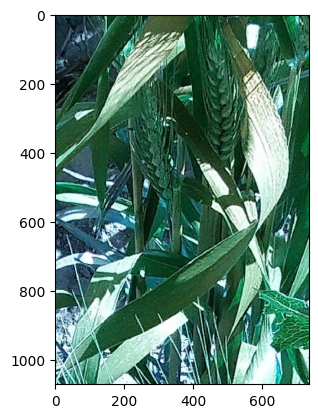

In [28]:
import matplotlib.pyplot as plt

plt.imshow(cv.imread(df[0][0]))

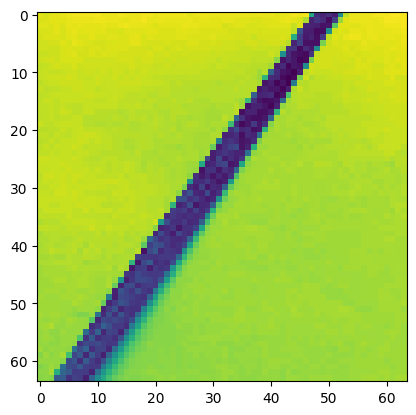

In [29]:
plt.imshow(test_img[0])

In [30]:
predicted_labels = le.inverse_transform(model.predict(test_img).argmax(axis=1))
actual_labels = le.inverse_transform(test_label)

18/18 [==============================] - 0s 7ms/step


18/18 [==============================] - 0s 7ms/step
printed label : 9
actual label : 7


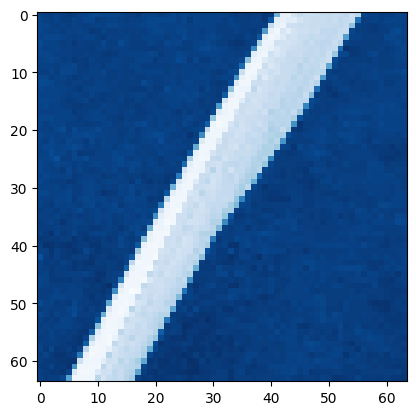

In [31]:
plt.imshow(test_img[25],cmap='Blues')
print('printed label :',model.predict(test_img).argmax(axis=1)[25])
print('actual label :', test_label[25])

In [32]:
print('predicted label is ;',predicted_labels[67])
print('Actual Label is :',actual_labels[67])

predicted label is ; Wheat___Brown_Rust
Actual Label is : Wheat___Brown_Rust


In [33]:
predicted_labels = le.inverse_transform(model.predict(test_img).argmax(axis=1))
actual_labels = le.inverse_transform(test_label)

18/18 [==============================] - 0s 7ms/step


In [35]:
print('predicted label is : ',predicted_labels[102])
print('Actual Label is : ',actual_labels[102])

predicted label is :  Rice___Leaf_Blast
Actual Label is :  Rice___Leaf_Blast
